# 參考資料
* [如何爬選擇權即時報價](http://yvictor.logdown.com/posts/996770)
* [台灣證券期貨交易所](http://info512.taifex.com.tw/Future/OptQuote_Norl.aspx)
* [phantomJS](http://phantomjs.org/)
* [阿肥bot](https://github.com/twtrubiks/line-bot-tutorial)

# 使用套件

In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver
from IPython.display import display
import pandas as pd
import numpy as np
import time

# 期交所選擇權即時資料爬蟲 phantomJS

In [3]:
driver = webdriver.PhantomJS()

In [4]:
driver.get('http://info512.taifex.com.tw/Future/OptQuote_Norl.aspx')

In [5]:
#若直接抓取選擇權頁面的資料不知道為什麼會被期交所擋住，所以先抓期交所裡面的其他資料，在這之後再抓選擇權資料，並且把這行覆蓋掉。
soup = BeautifulSoup(driver.page_source,'lxml')
pd.read_html(str(soup.select('#divDG')[0]),header=0)[0].loc[8:20]

IndexError: list index out of range

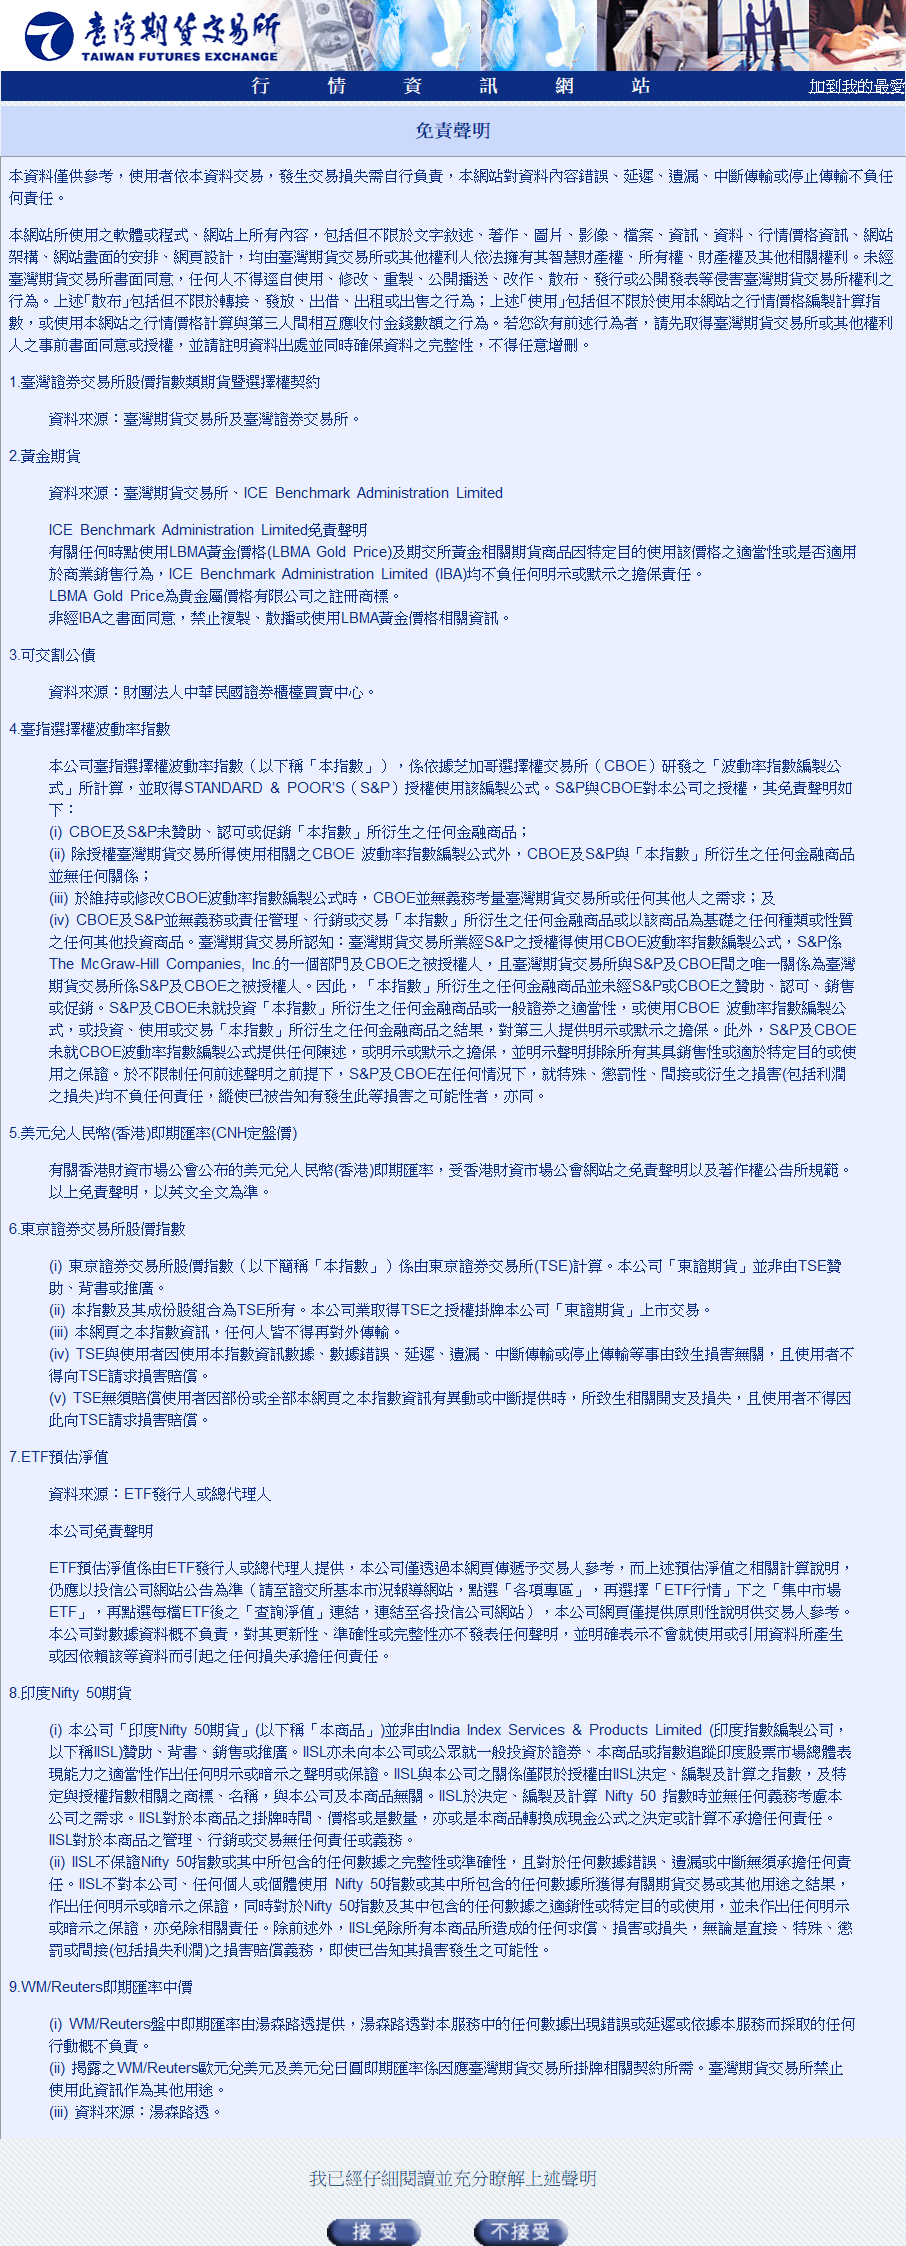

In [6]:
# phantomJS的螢幕截圖功能，讓我們確認正在爬的網頁狀態
driver.save_screenshot('screen.png')
from IPython.display import Image
Image('screen.png')

In [3]:
#若直接抓取選擇權頁面的資料不知道為什麼會被期交所擋住，所以先抓期交所裡面的其他資料，在這之後再抓選擇權資料，並且把這行覆蓋掉。
driver.get('http://info512.taifex.com.tw/Future/FusaQuote_Norl.aspx')

In [4]:
driver.get('http://info512.taifex.com.tw/Future/OptQuote_Norl.aspx')

In [5]:
#若直接抓取選擇權頁面的資料不知道為什麼會被期交所擋住，所以先抓期交所裡面的其他資料，在這之後再抓選擇權資料，並且把這行覆蓋掉。
soup = BeautifulSoup(driver.page_source,'lxml')
pd.read_html(str(soup.select('#divDG')[0]),header=0)[0].loc[8:20]

,買進,賣出,成交,漲跌,總量,時間,履約價,買進.1,賣出.1,成交.1,漲跌.1,總量.1,時間.1
8,275.0,277.0,277.000,-68.000,3,12:59:04,10550,NaN,0.1,0.100,-0.100,1139,13:23:06
9,225.0,226.0,225.000,-70.000,25,13:27:22,10600,NaN,0.2,0.100,-0.200,636,13:23:08
10,174.0,175.0,175.000,-70.000,224,13:27:12,10650,NaN,0.2,0.100,-0.300,1368,13:23:15
11,125.0,126.0,125.000,-70.000,2635,13:29:51,10700,NaN,0.1,0.100,-0.600,4198,13:23:32
12,75.0,76.0,75.000,-73.000,8243,13:29:45,10750,0.1,0.2,0.100,-0.900,13628,13:26:27
13,25.0,25.5,25.500,-75.500,42425,13:29:59,10800,NaN,0.1,0.100,-2.600,47382,13:28:27
14,0.1,0.2,0.100,-54.900,140546,13:29:32,10850,25.0,25.5,25.000,17.500,166787,13:29:54
15,NaN,0.2,0.100,-19.900,118058,13:28:30,10900,75.0,76.0,75.000,53.000,135177,13:29:59
16,NaN,0.1,0.200,-4.300,51345,13:25:29,10950,125.0,126.0,125.000,68.000,44252,13:29:59
17,NaN,0.1,0.100,-0.600,7755,13:22:53,11000,174.0,175.0,174.000,72.000,5510,13:27:11


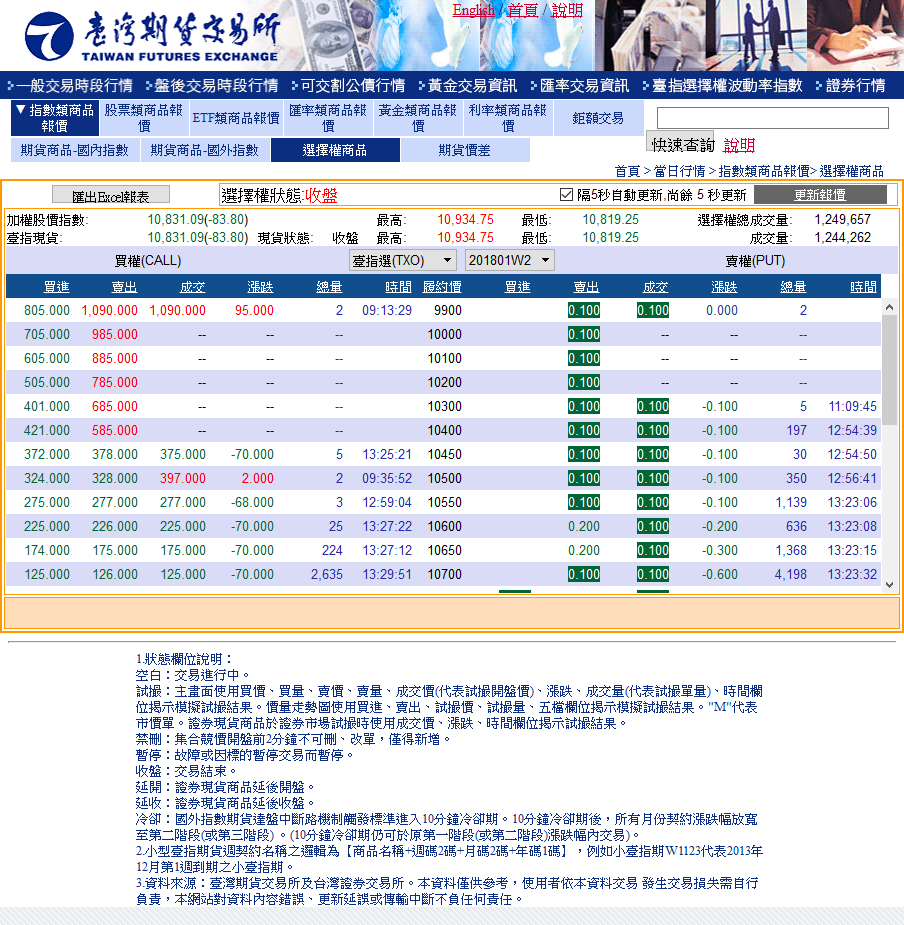

In [6]:
# phantomJS的螢幕截圖功能，讓我們確認正在爬的網頁狀態
driver.save_screenshot('screen.png')
from IPython.display import Image
Image('screen.png')

# Select Box 切換到期月份

In [7]:
selectbox = webdriver.support.ui.Select(driver.find_element_by_name('ctl00$ContentPlaceHolder1$ddlFusa_SelMon'))
selectbox.all_selected_options
[sel.text for sel in selectbox.options]
selectbox.select_by_value([sel.text for sel in selectbox.options][1])

# 網頁顯示快? 爬蟲快?

In [8]:
#因為期交所網站切換葉面實在是他媽的太慢了，所以先讓他睡一秒鐘
time.sleep(1)

In [9]:
soup = BeautifulSoup(driver.page_source,'lxml')
pd.read_html(str(soup.select('#divDG')[0]),header=0)[0].loc[8:20]

,買進,賣出,成交,漲跌,總量,時間,履約價,買進.1,賣出.1,成交.1,漲跌.1,總量.1,時間.1
8,1100.0,1370.0,--,--,--,NaN,9600,0.1,0.8,0.300,0.100,208,13:40:23
9,1000.0,1180.0,--,--,--,NaN,9700,0.2,0.4,0.300,0.000,391,12:49:28
10,900.0,1170.0,--,--,--,NaN,9800,0.3,0.4,0.400,0.000,247,13:38:50
11,905.0,1070.0,970.000,-10.000,1,09:23:30,9900,0.4,0.6,0.500,0.100,247,13:26:05
12,705.0,980.0,820.000,-60.000,1,12:51:10,10000,0.5,0.7,0.600,0.000,1670,13:44:59
13,600.0,880.0,--,--,--,NaN,10100,0.6,0.9,0.800,0.100,1270,13:44:16
14,505.0,630.0,610.000,-70.000,2,11:08:35,10200,1.0,1.1,1.000,0.200,4397,13:44:43
15,500.0,650.0,515.000,-65.000,56,13:40:39,10300,1.6,1.8,1.600,0.500,10527,13:44:54
16,406.0,425.0,413.000,-69.000,168,13:44:30,10400,2.5,2.7,2.500,0.900,9215,13:44:54
17,312.0,315.0,313.000,-70.000,686,13:44:32,10500,3.8,4.0,4.000,1.300,13839,13:44:58


# 確認已經換月成功

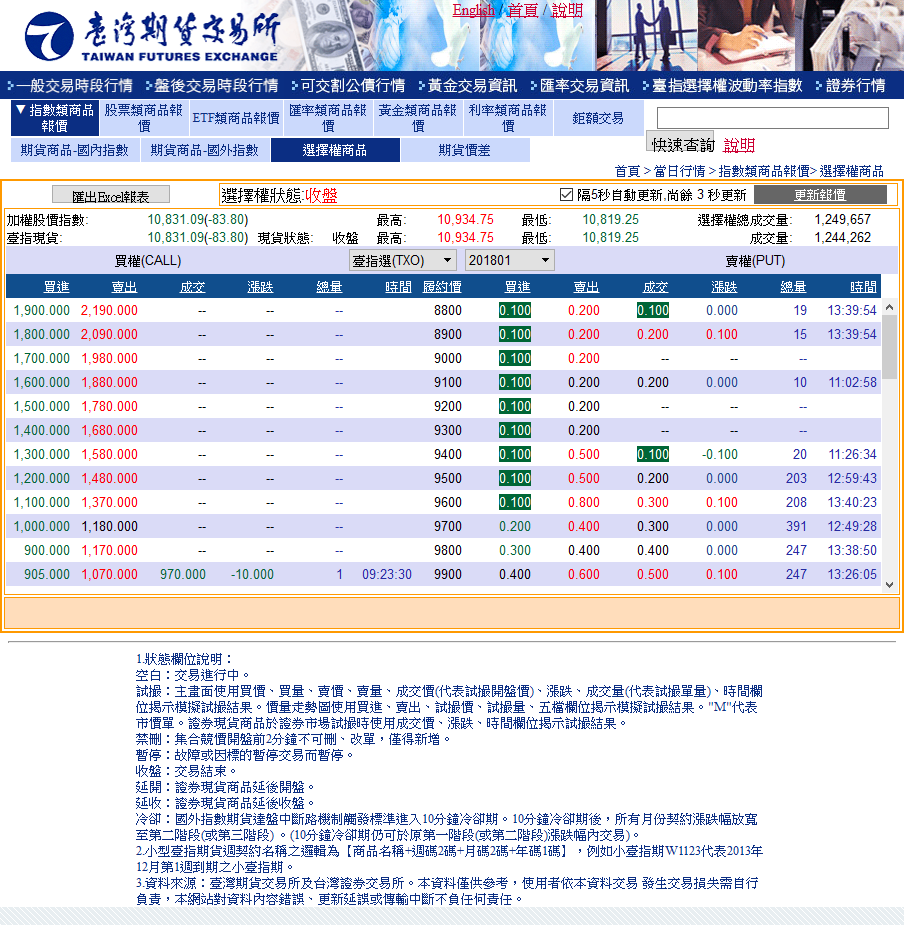

In [10]:
# phantomJS的螢幕截圖功能，讓我們確認正在爬的網頁狀態
driver.save_screenshot('screen.png')
from IPython.display import Image
Image('screen.png')

# 資料處理

In [11]:
#將Call資料與Put資料分別放到兩個dataframe裡面
soup = BeautifulSoup(driver.page_source,"lxml")
table = pd.read_html(str(soup.select('#divDG')[0]))[0]
Call = table.loc[:,:6]
Put = table.loc[:,6:]
Call.columns = Call.loc[0]
Call = Call[1:]
Put.columns = Put.loc[0]
Put = Put[1:]

In [12]:
def Vol_conversion(input_ele):
    if input_ele == '--':
        return 0
    if input_ele!= '--':
        return int(''.join(input_ele.split(',')))
def mon_float(input_ele):
    if input_ele == '--':
        return None
    if input_ele!= '--':
        return float(''.join(input_ele.split(',')))

In [13]:
display(Call.head(3))
Call['總量'] = Call['總量'].map(Vol_conversion)
Put['總量'] = Put['總量'].map(Vol_conversion)
Call['成交'] = Call['成交'].map(mon_float)
Put['成交'] = Put['成交'].map(mon_float)
Call['履約價']=Call['履約價'].map(lambda x:int(x))
Put['履約價']=Put['履約價'].map(lambda x:int(x))
display(Call.head(3))

,買進,賣出,成交,漲跌,總量,時間,履約價
1,1900.000,2190.000,--,--,--,NaN,8800
2,1800.000,2090.000,--,--,--,NaN,8900
3,1700.000,1980.000,--,--,--,NaN,9000


,買進,賣出,成交,漲跌,總量,時間,履約價
1,1900.000,2190.000,NaN,--,0,NaN,8800
2,1800.000,2090.000,NaN,--,0,NaN,8900
3,1700.000,1980.000,NaN,--,0,NaN,9000


## 保證金算法

In [14]:
driver.get('http://info512.taifex.com.tw/Future/FusaQuote_Norl.aspx?d=080585')

In [15]:
#先抓出現貨價格
soup = BeautifulSoup(driver.page_source,'lxml')
pd.read_html(str(soup.select('#divDG')[0]),header=0)[0].loc[0:0]

,商品,狀態,買價,買量,賣價,賣量,成交價,漲跌,振幅％,成交量,開盤,最高,最低,參考價,時間
0,臺指現貨,收盤,NaN,--,NaN,--,10831.09,-83.80,1.06,--,10915.32,10934.75,10819.25,10914.89,13:33:19


In [16]:
Spot_information = pd.read_html(str(soup.select('#divDG')[0]),header=0)[0].loc[0:0]

In [38]:
#給定期交所上的保證金A值以及B值
#賣出買權/賣出CALL : 權利金市值+MAXIMUM(A值-價外值，B值)
#賣出賣權/賣出PUT : 權利金市值+MAXIMUM(A值-價外值，B值)
A = 22000
B = 11000
S = float(Spot_information['成交價'])
spread1 = Call['履約價']-S
spread2 = S-Put['履約價']

In [39]:
Call["價外值"]=np.nan
for i in range(1,len(Call)):
    if spread1[i] > 0:
        Call["價外值"][i] = spread1[i] 
    else:
        Call["價外值"][i] = 0

C:\Users\ericlin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ericlin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [40]:
Call['保證金']=np.nan
for i in range (1,len(Call)):
    Call['保證金'][i] = Call['成交'][i]*50 + max(A-Call["價外值"][i],B)

C:\Users\ericlin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
Put["價外值"]=np.nan
for i in range(1,len(Put)):
    if spread2[i] > 0:
        Put["價外值"][i] = spread2[i] 
    else:
        Put["價外值"][i] = 0

C:\Users\ericlin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\ericlin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [42]:
Put['保證金']=np.nan
for i in range (1,len(Put)):
    Put['保證金'][i] = Put['成交'][i]*50 + max(A-Put["價外值"][i],B)

C:\Users\ericlin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
display(Call.loc[8:20])
display(Put.loc[8:20])

,買進,賣出,成交,漲跌,總量,時間,履約價,價外值,保證金
8,1200.000,1480.000,NaN,--,0,NaN,9500,0.0,NaN
9,1100.000,1370.000,NaN,--,0,NaN,9600,0.0,NaN
10,1000.000,1180.000,NaN,--,0,NaN,9700,0.0,NaN
11,900.000,1170.000,NaN,--,0,NaN,9800,0.0,NaN
12,905.000,1070.000,970.0,-10.000,1,09:23:30,9900,0.0,70500.0
13,705.000,980.000,820.0,-60.000,1,12:51:10,10000,0.0,63000.0
14,600.000,880.000,NaN,--,0,NaN,10100,0.0,NaN
15,505.000,630.000,610.0,-70.000,2,11:08:35,10200,0.0,52500.0
16,500.000,650.000,515.0,-65.000,56,13:40:39,10300,0.0,47750.0
17,406.000,425.000,413.0,-69.000,168,13:44:30,10400,0.0,42650.0


,履約價,買進,賣出,成交,漲跌,總量,時間,價外值,保證金
8,9500,0.100,0.500,0.2,0.000,203,12:59:43,1331.09,20678.91
9,9600,0.100,0.800,0.3,0.100,208,13:40:23,1231.09,20783.91
10,9700,0.200,0.400,0.3,0.000,391,12:49:28,1131.09,20883.91
11,9800,0.300,0.400,0.4,0.000,247,13:38:50,1031.09,20988.91
12,9900,0.400,0.600,0.5,0.100,247,13:26:05,931.09,21093.91
13,10000,0.500,0.700,0.6,0.000,1670,13:44:59,831.09,21198.91
14,10100,0.600,0.900,0.8,0.100,1270,13:44:16,731.09,21308.91
15,10200,1.000,1.100,1.0,0.200,4397,13:44:43,631.09,21418.91
16,10300,1.600,1.800,1.6,0.500,10527,13:44:54,531.09,21548.91
17,10400,2.500,2.700,2.5,0.900,9215,13:44:54,431.09,21693.91


## 如何計算價平

In [44]:
at_the_money = Call['履約價'] + Call['成交'] - Put['成交']

In [45]:
difference = at_the_money - Call['履約價']

In [46]:
df = pd.concat([at_the_money,Call['履約價'],Call['成交'],Call['保證金'],Put['成交'],Put['保證金']],axis = 1)

In [47]:
df.columns= ['K+C-P', 'Exercise_Price', 'Premium_Call', 'Margin_Call', 'Premium_Put', 'Margin_Put']
df[13:26]

,K+C-P,Exercise_Price,Premium_Call,Margin_Call,Premium_Put,Margin_Put
14,NaN,10100,NaN,NaN,0.8,21308.91
15,10809.0,10200,610.0,52500.00,1.0,21418.91
16,10813.4,10300,515.0,47750.00,1.6,21548.91
17,10810.5,10400,413.0,42650.00,2.5,21693.91
18,10809.0,10500,313.0,37650.00,4.0,21868.91
19,10810.3,10600,218.0,32900.00,7.7,22153.91
20,10812.5,10650,175.0,30750.00,12.5,22443.91
21,10809.5,10700,129.0,28450.00,19.5,22843.91
22,10809.0,10750,90.0,26500.00,31.0,23468.91
23,10809.5,10800,58.0,24900.00,48.5,24393.91


# 選擇權策略

In [48]:
def triangle(df):
    diff=df['K+C-P']-df['Exercise_Price']
    diff=abs(diff)
    diff.min(skipna=True)

    loc=abs(diff)==diff.min(skipna=True)
    loc=list(loc)
    loc=loc.index(1)
    df2=df[(loc):(loc+1)]
    long_call=df2['Premium_Call'].iloc[0]
    long_put=df2['Premium_Put'].iloc[0]

    money_need=long_call+long_put
    return money_need

In [49]:
def square(df):
    diff=df['K+C-P']-df['Exercise_Price']
    diff=abs(diff)
    diff.min(skipna=True)

    loc=abs(diff)==diff.min(skipna=True)
    loc=list(loc)
    loc=loc.index(1)
    data=df[(loc-2):(loc+3)]
    long_low_put=data['Premium_Put'].iloc[1]
    long_high_call=data['Premium_Call'].iloc[4]

    money_need=long_low_put+long_high_call
    return money_need

In [50]:
def bullish_spread(df):
    diff=df['K+C-P']-df['Exercise_Price']
    diff=abs(diff)
    diff.min(skipna=True)

    loc=abs(diff)==diff.min(skipna=True)
    loc=list(loc)
    loc=loc.index(1)
    data=df[(loc-2):(loc+3)]
    long_low_call=data['Premium_Call'].iloc[0]
    long_low_call_K=data['Exercise_Price'].iloc[0]

    short_high_call=data['Premium_Call'].iloc[4]
    short_high_call_K=data['Exercise_Price'].iloc[4]
    short_high_call_margin=data['Margin_Call'].iloc[4]

    Premium_cost=round(long_low_call)
    Premium_cost_K=round(long_low_call_K)
    Premium_rev=round(short_high_call)
    Premium_rev_K=round(short_high_call_K)
    return [Premium_cost_K,Premium_cost,Premium_rev_K,Premium_rev,short_high_call_margin]

In [51]:
def bearish_spread(df):
    diff=df['K+C-P']-df['Exercise_Price']
    diff=abs(diff)
    diff.min(skipna=True)

    loc=abs(diff)==diff.min(skipna=True)
    loc=list(loc)
    loc=loc.index(1)
    data=df[(loc-2):(loc+3)]
    long_high_call=data['Premium_Call'].iloc[4]
    long_high_call_K=data['Exercise_Price'].iloc[4]

    short_low_call=data['Premium_Call'].iloc[0]
    short_low_call_K=data['Exercise_Price'].iloc[0]
    short_low_call_margin=data['Margin_Call'].iloc[0]

    Premium_cost=round(long_high_call)
    Premium_cost_K=round(long_high_call_K)

    Premium_rev=round(short_low_call)
    Premium_rev_K=round(short_low_call_K)

    money_need=long_high_call+short_low_call_margin
    return [Premium_cost_K,Premium_cost,Premium_rev_K,Premium_rev,short_low_call_margin]

# MyPod 我們自製的模組
* 爬月選擇權資料
* 爬周選擇權資料
* 計算買入跨式、勒式、多頭價差、空頭價差的成本
* 心靈小語

In [52]:
import MyMod

In [53]:
df = MyMod.opmonth()
df.loc[8:20]

,K+C-P,Exercise_Price,Premium_Call,Margin_Call,Premium_Put,Margin_Put
8,NaN,9500,NaN,NaN,10.0,22010.0
9,NaN,9600,NaN,NaN,15.0,22015.0
10,NaN,9700,NaN,NaN,15.0,22015.0
11,NaN,9800,NaN,NaN,20.0,22020.0
12,10869.5,9900,48500.0,69568.91,25.0,22025.0
13,10819.4,10000,41000.0,62168.91,30.0,22030.0
14,NaN,10100,NaN,NaN,40.0,22040.0
15,10809.0,10200,30500.0,51868.91,50.0,22050.0
16,10813.4,10300,25750.0,47218.91,80.0,22080.0
17,10810.5,10400,20650.0,42218.91,125.0,22125.0


In [54]:
price = MyMod.bullish_spread(df)
price
# 買入 Call(k = 10700) 權利金支出 6450.0元
# 同時賣出 Call(k = 10900) 權利金收入 900.0元 並支付保證金 22900.0元

[10700, 6450.0, 10900, 900.0, 22900.0]

# Line bot
![line-bot](Line-bot.png)